## Scipy Signal Processing
Just a notebook for better learning how signal processsing, and Scipy functions for it actually work

#### Questions, Leads
1. Fundamentals of signal processing?
2. Check the UAIS presentation
3. Beginner's guide to speech recognition (https://towardsdatascience.com/beginners-guide-to-speech-analysis-4690ca7a7c05)
4. Apparently MFCC's are a thing **Maybe not needed**
5. Librosa Audio library seems to be popular

Base code is pulled straight from the Scipy Signal Docs
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram

In [3]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np

Generate a test signal, a 2 Vrms sine wave whose frequency is slowly modulated around 3kHz, corrupted by white noise of exponentially decreasing magnitude sampled at 10 kHz.

- Vrms: Voltage root mean squared. The effective voltage of the varying signal, if it was electric
- frequency modulation: literally changing the signal frequency

In [12]:
signal.spectrogram?

In [11]:
fs = 10e3 # sampling frequency? default 1.0, this is 10k
N = 1e5 # 100k, maybe number of samples?
amp = 2 * np.sqrt(2) # amplitude
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

Need to graph this signal straight up

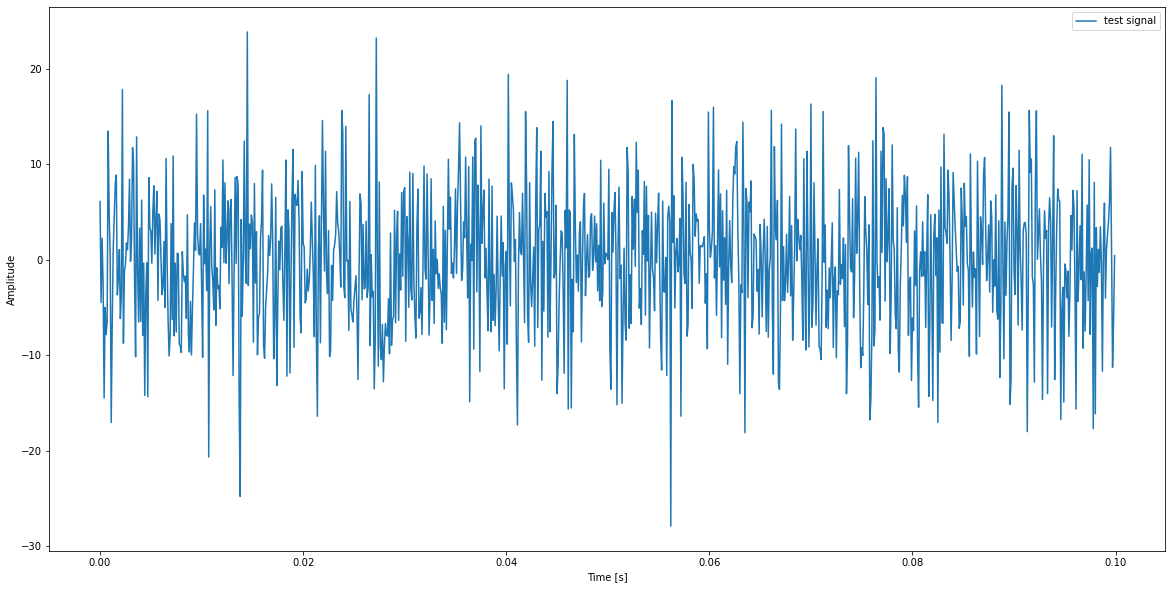

In [37]:
chunk = int(N)//100 # take 1/1000 second chunk
length = N//fs

time = np.linspace(0, length, int(N))
plt.figure(figsize=(20, 10))
plt.plot(time[:chunk], x[:chunk], label="test signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Looks just as angry as my wav file machine data.
- x: array, time series of values (10k long 1d array)
- fs: sampling frequency (10k, mine is 16k)
- f: array, sample frequencies (129 long 1d array??)
- t: array, segment times? (446, 1d long array)
- Sxx: array, spectrogram, last axis is segment times (129 freqs by 446 segment times, 2d array)

In [53]:
signal.spectrogram?

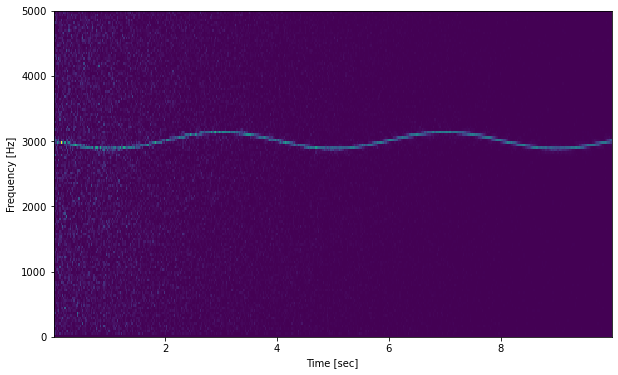

In [58]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(10,6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

What does One-sided output even mean?

## MFCC Spectrogram
Apparently used in speech recognition?  Uses quasi logarithmic frequency spacing?

**Apparently** MFCC stuff may not be necessary, with the advent of deep learning.
- on second inspection probably need it